# RAINFALL WEATHER FORECASTING

In [ ]:
Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Importing the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\Rainfall wheather forcast.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(8425, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
## Now we will check the Null Values

df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [ ]:
Now we will seprate the Date cloumns

In [8]:
df['Year'] = [i.split('-')[0] for i in df['Date']]
df['Month'] = [i.split('-')[1] for i in df['Date']]
df['Day'] = [i.split('-')[2] for i in df['Date']]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,01,12,2008
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,02,12,2008
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,03,12,2008
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,04,12,2008
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,05,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,06,2017
8421,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,06,2017
8422,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,06,2017
8423,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,06,2017


In [9]:
df = df.drop(columns = ['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,01,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,02,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,03,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,04,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,05,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,06,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,06,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,06,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,06,2017


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [11]:
df['Year'] = df['Year'].astype(float)
df['Month'] = df['Month'].astype(float)
df['Day'] = df['Day'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

In [12]:
categorical_columns = ['Location','WindGustDir','WindDir9am','WindDir3pm']


In [13]:
for i in categorical_columns:
    print(df[i].unique())

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [14]:
from sklearn.preprocessing import LabelEncoder


In [15]:
lab = LabelEncoder()

In [16]:
for i in categorical_columns:
    df[i] = lab.fit_transform(df[i])
    
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,1007.1,8.0,NaN,16.9,21.8,No,No,1.0,12.0,2008.0
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,1007.8,NaN,NaN,17.2,24.3,No,No,2.0,12.0,2008.0
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,1008.7,NaN,2.0,21.0,23.2,No,No,3.0,12.0,2008.0
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,1012.8,NaN,NaN,18.1,26.5,No,No,4.0,12.0,2008.0
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,No,No,5.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,1020.3,NaN,NaN,10.1,22.4,No,No,21.0,6.0,2017.0
8421,9,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,1019.1,NaN,NaN,10.9,24.5,No,No,22.0,6.0,2017.0
8422,9,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,1016.8,NaN,NaN,12.5,26.1,No,No,23.0,6.0,2017.0
8423,9,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,No,No,24.0,6.0,2017.0


In [17]:
df.isnull().sum()


Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
dtype: int64

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [20]:
ii = IterativeImputer()


In [21]:
iter_col = pd.DataFrame(ii.fit_transform(df[['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]),
                        columns = ['MinTemp1','MaxTemp1','Evaporation1','Sunshine1','WindGustSpeed1','WindSpeed9am1','WindSpeed3pm1','Humidity9am1','Humidity3pm1','Pressure9am1','Pressure3pm1','Cloud9am1','Cloud3pm1','Temp9am1','Temp3pm1'])

df = df.join(iter_col)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.173594,16.9,21.8
1,1,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.041577,1.656602,17.2,24.3
2,1,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.101106,2.000000,21.0,23.2
3,1,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.451296,1.077309,18.1,26.5
4,1,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,NaN,NaN,0,31.0,9,1,...,13.0,11.0,51.0,24.0,1024.6,1020.3,0.662706,1.515771,10.1,22.4
8421,9,3.6,25.3,0.0,NaN,NaN,6,22.0,9,3,...,13.0,9.0,56.0,21.0,1023.5,1019.1,0.531724,1.089647,10.9,24.5
8422,9,5.4,26.9,0.0,NaN,NaN,3,37.0,9,14,...,9.0,9.0,53.0,24.0,1021.0,1016.8,0.773309,1.513927,12.5,26.1
8423,9,7.8,27.0,0.0,NaN,NaN,9,28.0,10,3,...,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [22]:
drop_columns = ['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']


In [23]:
df = df.drop(columns = drop_columns, axis=1)
df

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,No,No,1.0,12.0,2008.0,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,No,No,2.0,12.0,2008.0,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,No,No,3.0,12.0,2008.0,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,No,No,4.0,12.0,2008.0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,No,No,5.0,12.0,2008.0,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,0.0,0,9,1,No,No,21.0,6.0,2017.0,...,13.0,11.0,51.0,24.0,1024.6,1020.3,0.662706,1.515771,10.1,22.4
8421,9,0.0,6,9,3,No,No,22.0,6.0,2017.0,...,13.0,9.0,56.0,21.0,1023.5,1019.1,0.531724,1.089647,10.9,24.5
8422,9,0.0,3,9,14,No,No,23.0,6.0,2017.0,...,9.0,9.0,53.0,24.0,1021.0,1016.8,0.773309,1.513927,12.5,26.1
8423,9,0.0,9,10,3,No,No,24.0,6.0,2017.0,...,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [24]:
df.isnull().sum()


Location            0
Rainfall          240
WindGustDir         0
WindDir9am          0
WindDir3pm          0
RainToday         240
RainTomorrow      239
Year                0
Month               0
Day                 0
MinTemp1            0
MaxTemp1            0
Evaporation1        0
Sunshine1           0
WindGustSpeed1      0
WindSpeed9am1       0
WindSpeed3pm1       0
Humidity9am1        0
Humidity3pm1        0
Pressure9am1        0
Pressure3pm1        0
Cloud9am1           0
Cloud3pm1           0
Temp9am1            0
Temp3pm1            0
dtype: int64

In [25]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        8079 non-null   int32  
 1   Rainfall        8079 non-null   float64
 2   WindGustDir     8079 non-null   int32  
 3   WindDir9am      8079 non-null   int32  
 4   WindDir3pm      8079 non-null   int32  
 5   RainToday       8079 non-null   object 
 6   RainTomorrow    8079 non-null   object 
 7   Year            8079 non-null   float64
 8   Month           8079 non-null   float64
 9   Day             8079 non-null   float64
 10  MinTemp1        8079 non-null   float64
 11  MaxTemp1        8079 non-null   float64
 12  Evaporation1    8079 non-null   float64
 13  Sunshine1       8079 non-null   float64
 14  WindGustSpeed1  8079 non-null   float64
 15  WindSpeed9am1   8079 non-null   float64
 16  WindSpeed3pm1   8079 non-null   float64
 17  Humidity9am1    8079 non-null   f

In [26]:
ra0 = []
for i in df['RainToday']:
    if i == 'No':
        ra0.append(0)
    else:
        ra0.append(1)
        
df['RainToday']=ra0

ra1 = []
for i in df['RainTomorrow']:
    if i == 'No':
        ra1.append(0)
    else:
        ra1.append(1)
        
df['RainTomorrow']=ra0

df.head(10)


,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,0,0,1.0,12.0,2008.0,...,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,0,0,2.0,12.0,2008.0,...,4.0,22.0,44.0,25.0,1010.6,1007.8,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,0,0,3.0,12.0,2008.0,...,19.0,26.0,38.0,30.0,1007.6,1008.7,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,0,0,4.0,12.0,2008.0,...,11.0,9.0,45.0,16.0,1017.6,1012.8,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,0,0,5.0,12.0,2008.0,...,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
5,1,0.2,14,13,13,0,0,6.0,12.0,2008.0,...,19.0,24.0,55.0,23.0,1009.2,1005.4,2.770059,2.664609,20.6,28.9
6,1,0.0,13,12,13,0,0,7.0,12.0,2008.0,...,20.0,24.0,49.0,19.0,1009.6,1008.2,1.000000,1.789852,18.1,24.6
7,1,0.0,13,10,13,0,0,8.0,12.0,2008.0,...,6.0,17.0,48.0,19.0,1013.4,1010.1,0.899985,1.319043,16.3,25.5
8,1,0.0,6,9,7,0,0,9.0,12.0,2008.0,...,7.0,28.0,42.0,9.0,1008.9,1003.6,0.441913,1.316235,18.3,30.2
9,1,1.4,13,8,10,1,1,10.0,12.0,2008.0,...,15.0,11.0,58.0,27.0,1007.0,1005.7,2.441425,2.515289,20.1,28.2


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8079 entries, 0 to 8423
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        8079 non-null   int32  
 1   Rainfall        8079 non-null   float64
 2   WindGustDir     8079 non-null   int32  
 3   WindDir9am      8079 non-null   int32  
 4   WindDir3pm      8079 non-null   int32  
 5   RainToday       8079 non-null   int64  
 6   RainTomorrow    8079 non-null   int64  
 7   Year            8079 non-null   float64
 8   Month           8079 non-null   float64
 9   Day             8079 non-null   float64
 10  MinTemp1        8079 non-null   float64
 11  MaxTemp1        8079 non-null   float64
 12  Evaporation1    8079 non-null   float64
 13  Sunshine1       8079 non-null   float64
 14  WindGustSpeed1  8079 non-null   float64
 15  WindSpeed9am1   8079 non-null   float64
 16  WindSpeed3pm1   8079 non-null   float64
 17  Humidity9am1    8079 non-null   f

In [28]:
df = df.drop_duplicates()
df.shape

(6558, 25)

In [29]:
df.describe()

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Pressure3pm1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,...,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000
mean,5.309698,2.771134,8.805581,8.524855,8.131900,0.236810,0.236810,15.755261,6.425435,2012.038579,...,12.709382,17.461486,67.468941,50.431768,1017.897524,1015.334200,4.171577,4.153121,17.891992,22.687683
std,3.101063,10.599379,5.357085,5.098742,4.774093,0.425157,0.425157,8.796794,3.353119,2.298697,...,9.810945,9.569853,17.238927,18.598635,6.119038,6.033329,2.684602,2.527038,5.737449,5.988758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2008.000000,...,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,-1.851719,-2.647508,1.900000,7.300000
25%,2.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,8.000000,4.000000,2010.000000,...,6.000000,9.000000,56.000000,38.000000,1014.200000,1011.500000,1.636497,2.000000,13.800000,18.300000
50%,6.000000,0.000000,9.000000,9.000000,9.000000,0.000000,0.000000,16.000000,6.000000,2012.000000,...,11.000000,17.000000,68.000000,50.000000,1018.100000,1015.500000,4.056741,4.000000,17.900000,22.100000
75%,8.000000,0.800000,14.000000,13.000000,12.000000,0.000000,0.000000,23.000000,9.000000,2014.000000,...,19.000000,24.000000,80.000000,63.000000,1021.500000,1018.800000,7.000000,7.000000,22.200000,26.800000
max,11.000000,371.000000,16.000000,16.000000,16.000000,1.000000,1.000000,31.000000,12.000000,2017.000000,...,61.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,10.130503,9.883757,39.400000,44.100000


Data Visualization

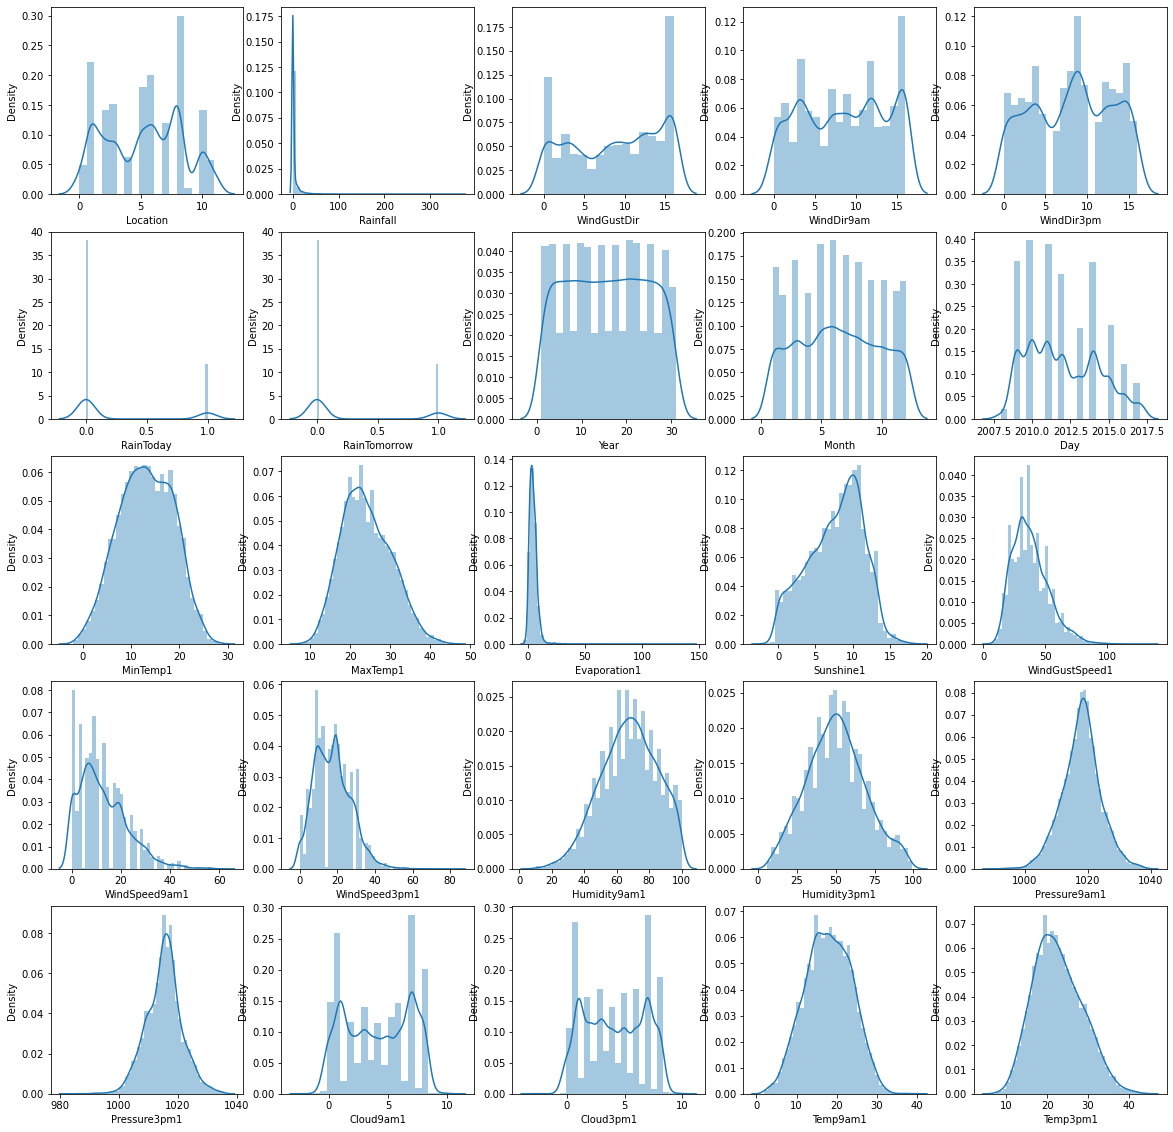

In [30]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


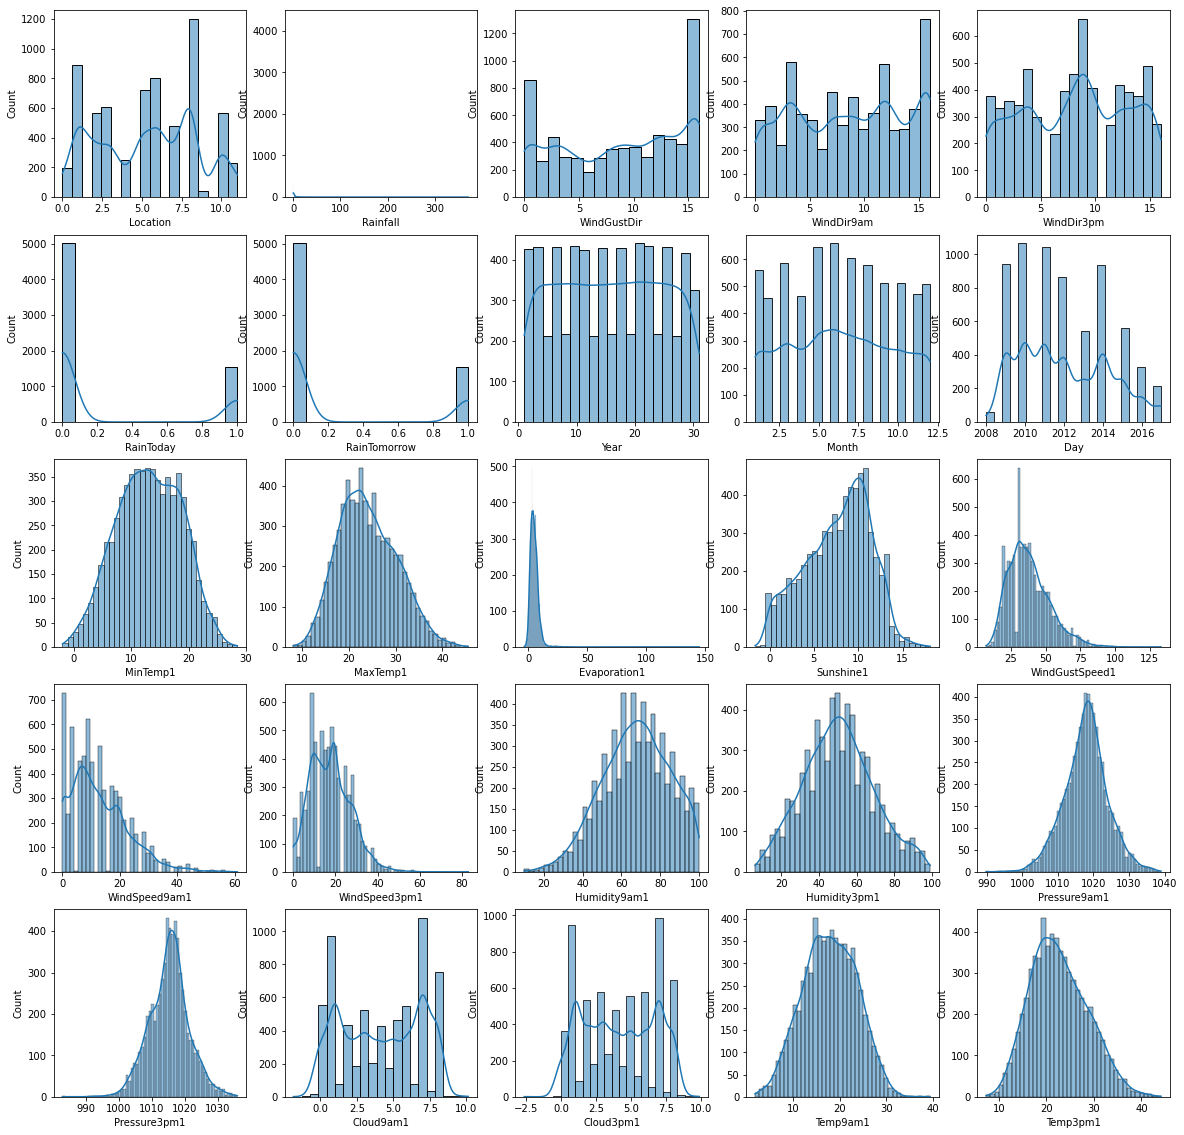

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.histplot(x=column,data=df,kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

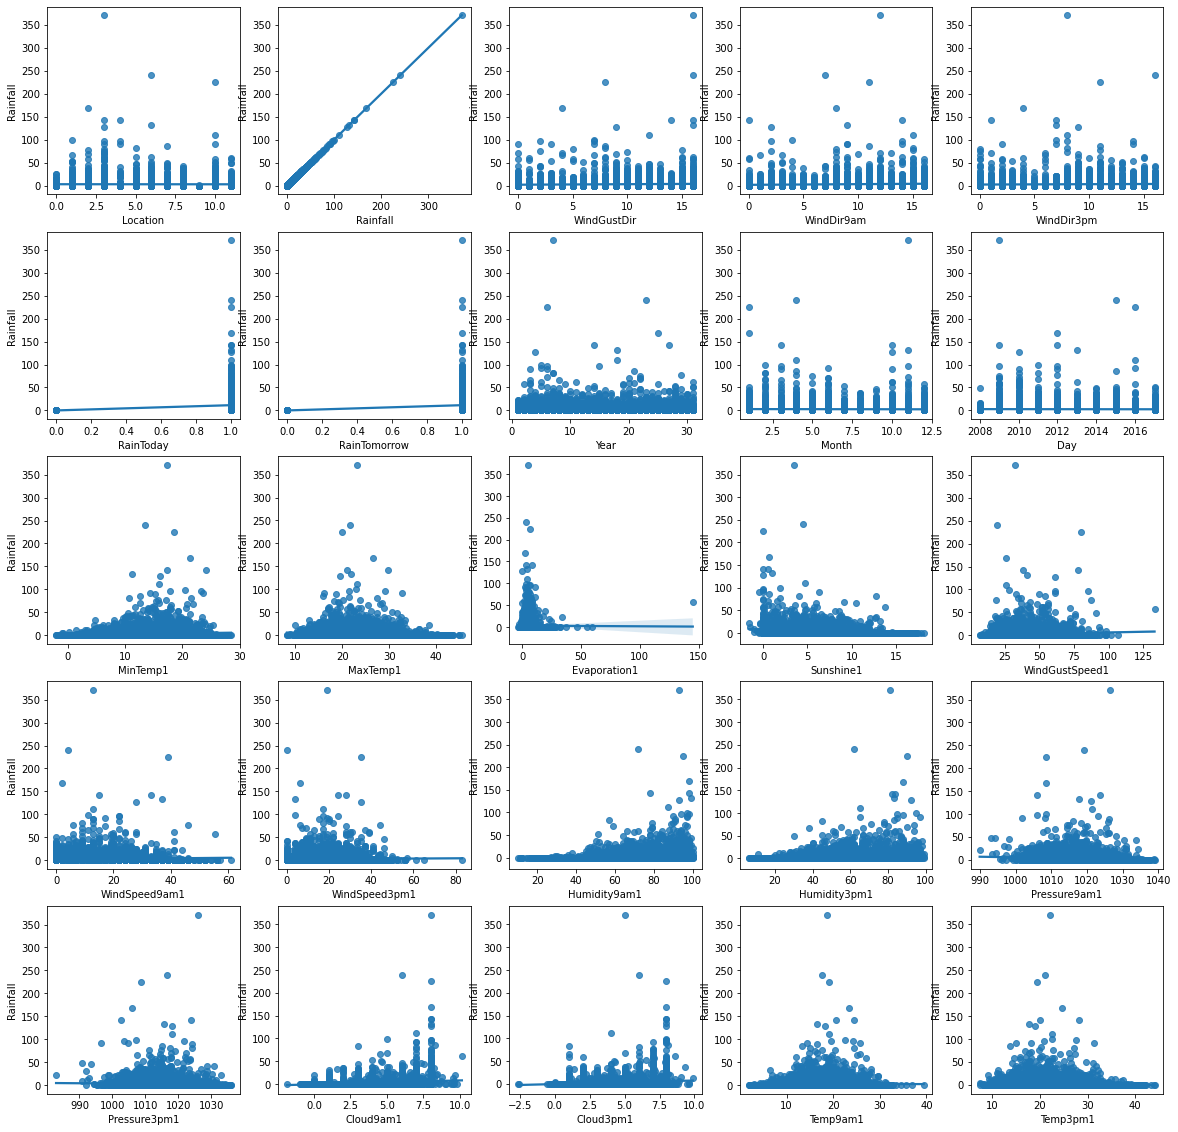

In [32]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.regplot(x=column,y='Rainfall',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

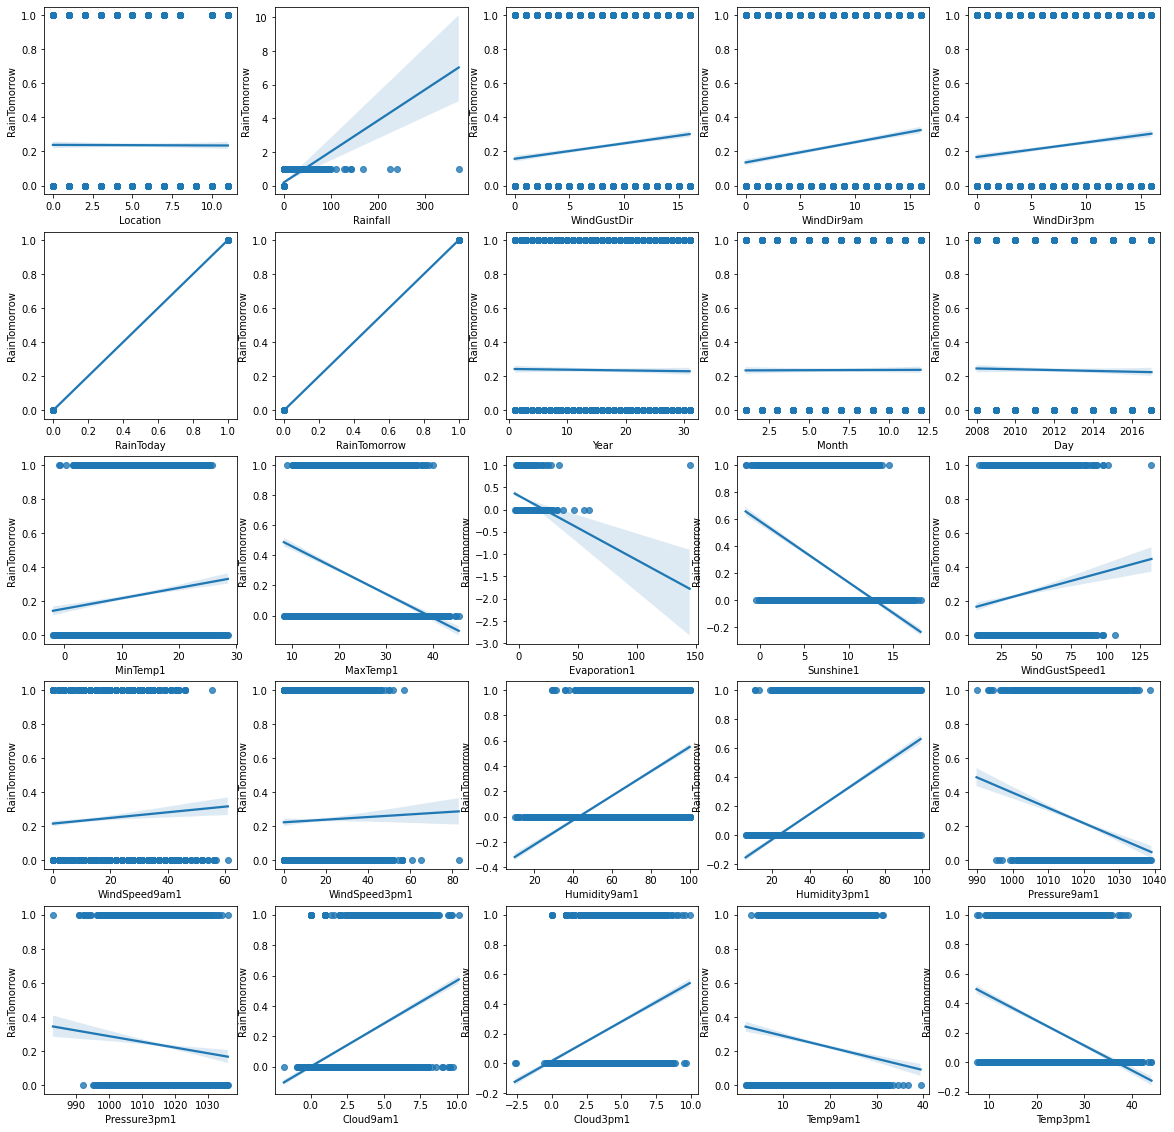

In [33]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.regplot(x=column,y='RainTomorrow',data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

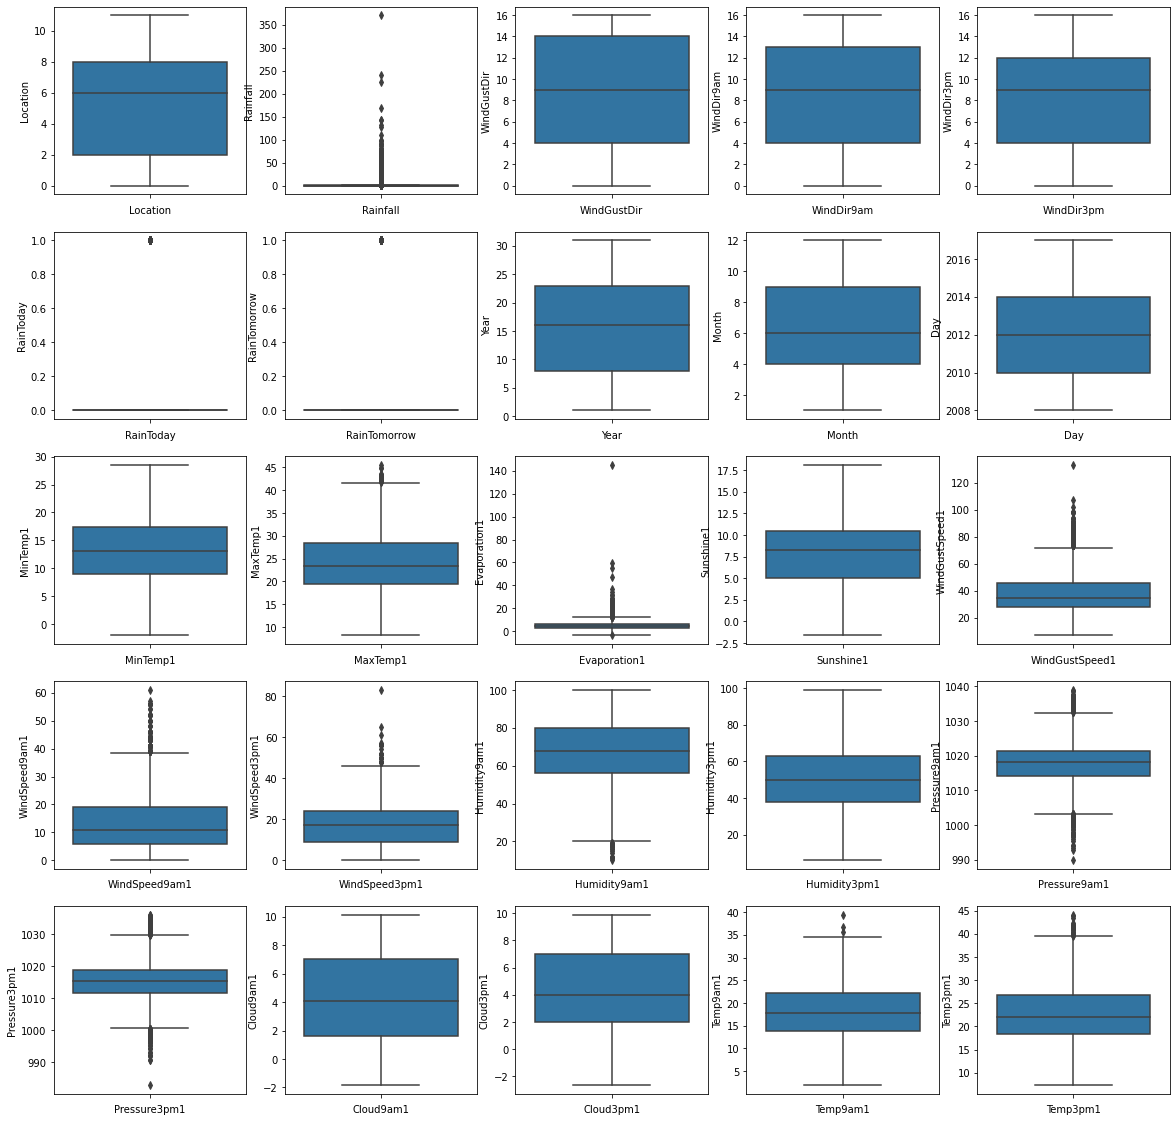

In [34]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Removing Outliers

In [35]:
from scipy import stats

In [36]:
from scipy.stats import zscore

z_score = zscore(df[['Rainfall','Evaporation1','WindGustSpeed1','WindSpeed9am1','WindSpeed3pm1','Pressure9am1','Pressure3pm1']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(6273, 25)

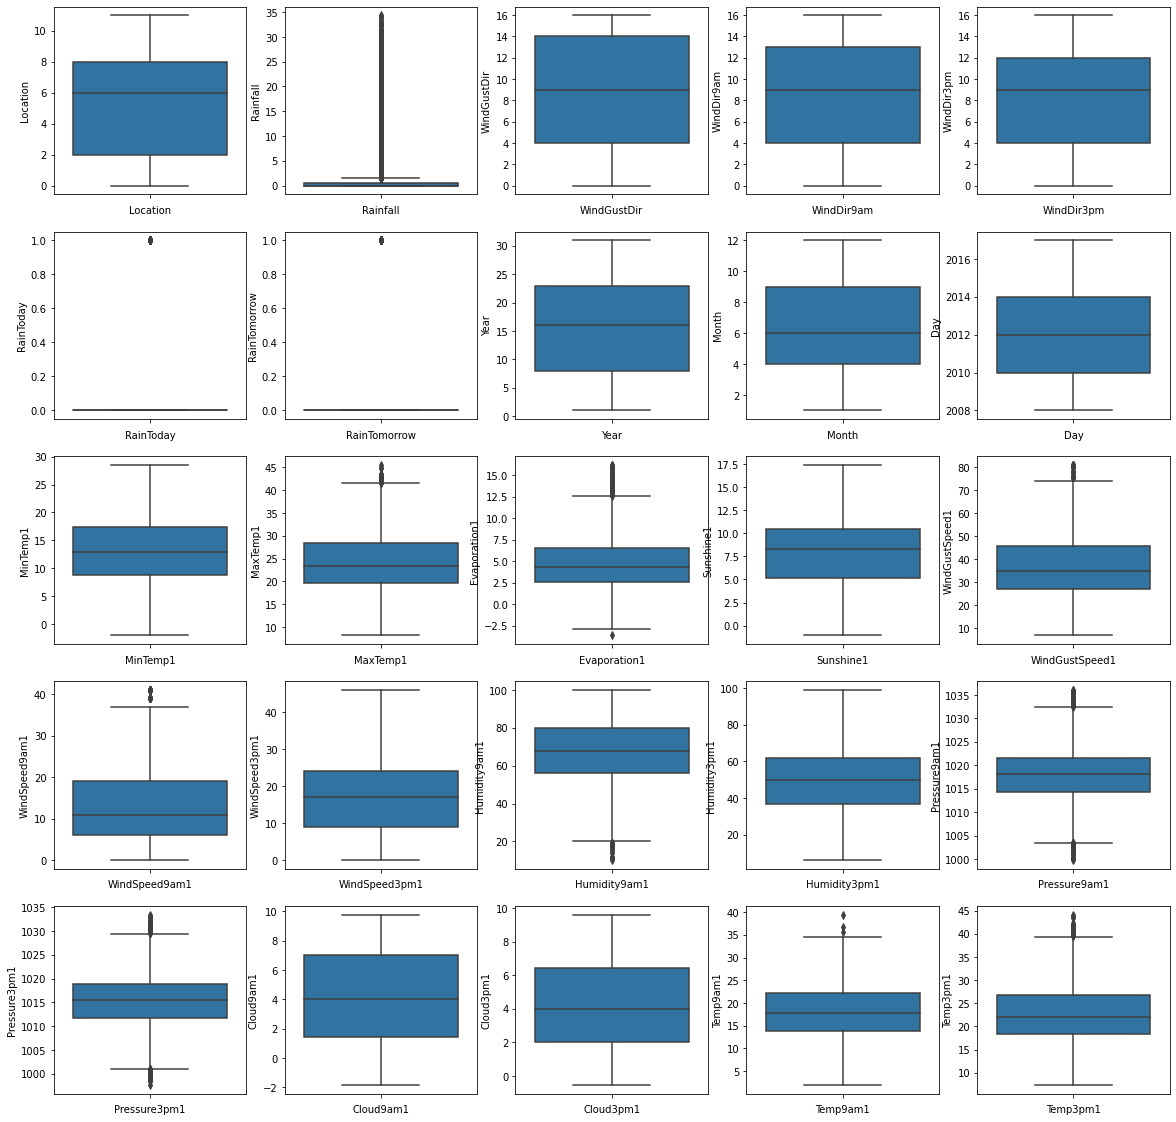

In [37]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [38]:
z_score = zscore(df[['Rainfall','Evaporation1','WindGustSpeed1','WindSpeed9am1','WindSpeed3pm1','Pressure9am1','Pressure3pm1']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(5980, 25)

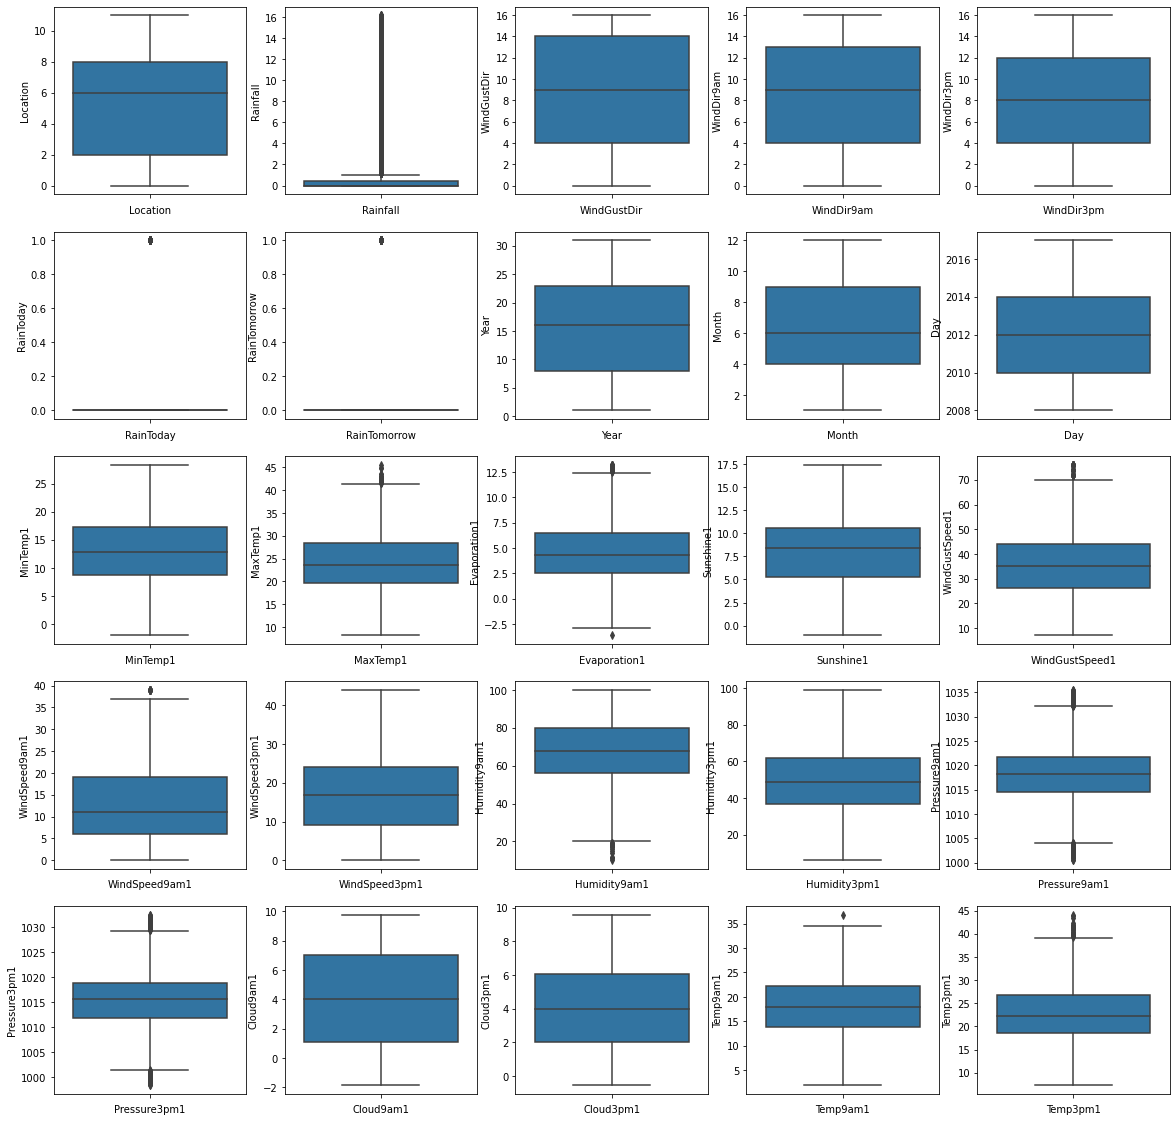

In [39]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(y=column,data=df)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

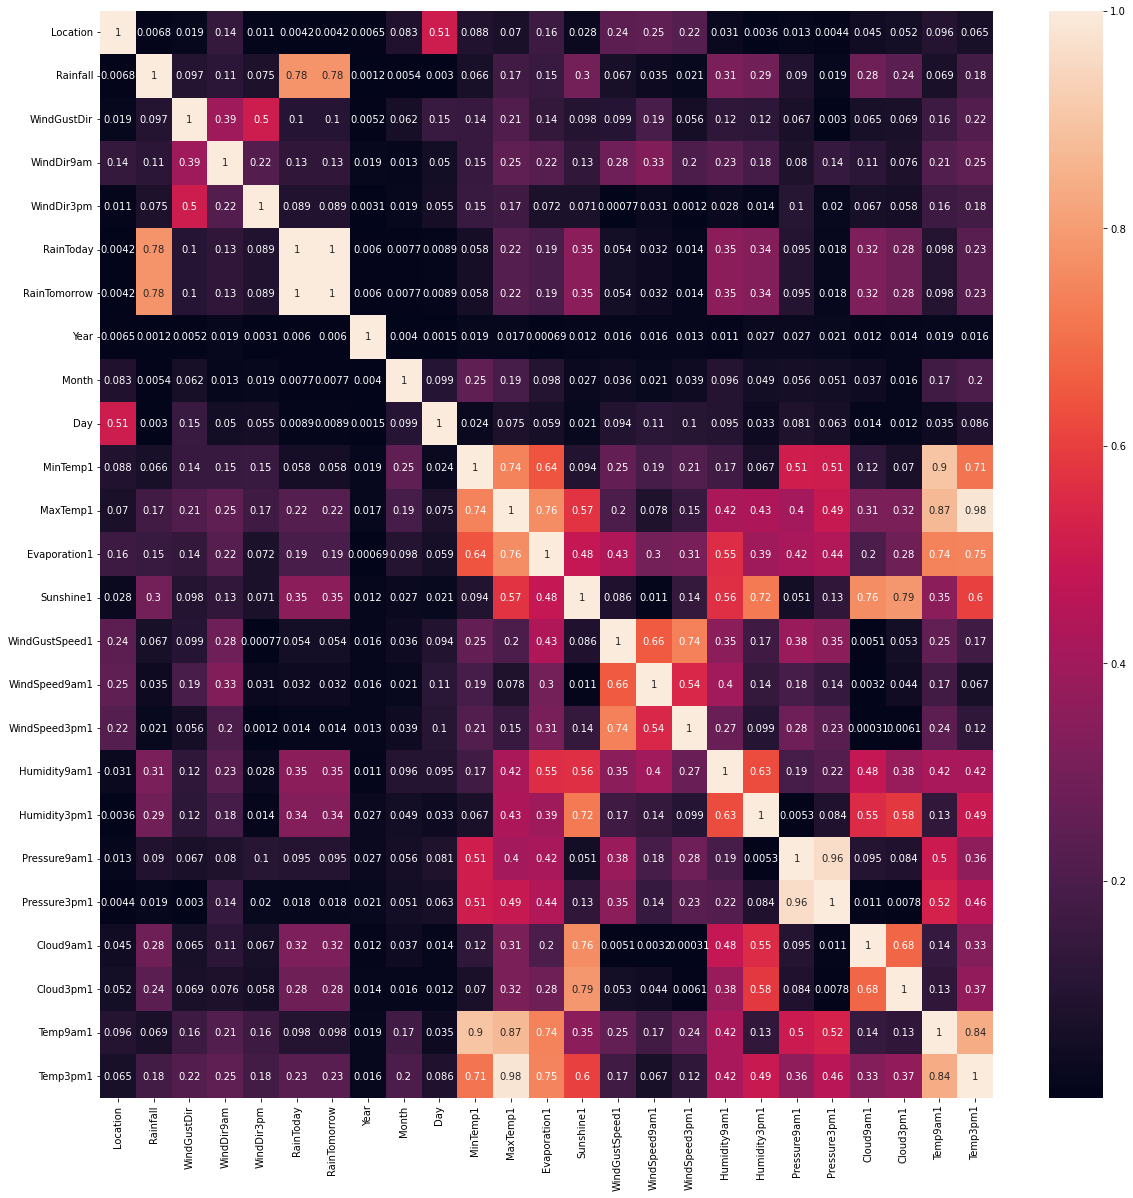

In [40]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

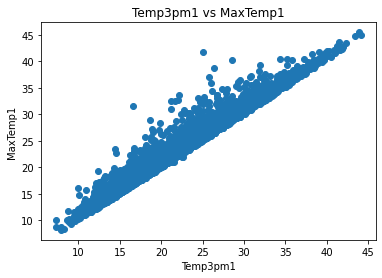

In [41]:
plt.scatter(df['Temp3pm1'], df['MaxTemp1'])
plt.xlabel('Temp3pm1')
plt.ylabel('MaxTemp1')
plt.title('Temp3pm1 vs MaxTemp1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

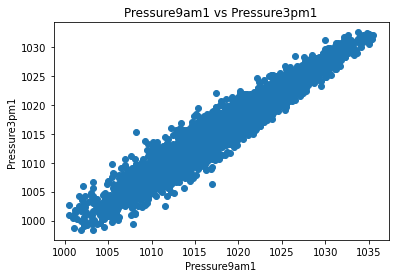

In [42]:
plt.scatter(df['Pressure9am1'], df['Pressure3pm1'])
plt.xlabel('Pressure9am1')
plt.ylabel('Pressure3pm1')
plt.title('Pressure9am1 vs Pressure3pm1')
plt.show

In [43]:
drop = ['MaxTemp1','Pressure3pm1']
df = df.drop(columns = drop, axis=1)
df

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,...,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,0,0,1.0,12.0,2008.0,...,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,0,0,2.0,12.0,2008.0,...,44.0,4.0,22.0,44.0,25.0,1010.6,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,0,0,3.0,12.0,2008.0,...,46.0,19.0,26.0,38.0,30.0,1007.6,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,0,0,4.0,12.0,2008.0,...,24.0,11.0,9.0,45.0,16.0,1017.6,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,0,0,5.0,12.0,2008.0,...,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,0.0,0,2,0,0,0,20.0,6.0,2017.0,...,31.0,15.0,13.0,59.0,27.0,1024.7,1.696751,2.114077,9.4,20.9
8420,9,0.0,0,9,1,0,0,21.0,6.0,2017.0,...,31.0,13.0,11.0,51.0,24.0,1024.6,0.662706,1.515771,10.1,22.4
8421,9,0.0,6,9,3,0,0,22.0,6.0,2017.0,...,22.0,13.0,9.0,56.0,21.0,1023.5,0.531724,1.089647,10.9,24.5
8422,9,0.0,3,9,14,0,0,23.0,6.0,2017.0,...,37.0,9.0,9.0,53.0,24.0,1021.0,0.773309,1.513927,12.5,26.1


In [44]:
df.skew()

Location          0.003907
Rainfall          2.935102
WindGustDir      -0.200998
WindDir9am       -0.070806
WindDir3pm       -0.064583
RainToday         1.474483
RainTomorrow      1.474483
Year             -0.000044
Month             0.037501
Day               0.349979
MinTemp1         -0.050833
Evaporation1      0.420386
Sunshine1        -0.367485
WindGustSpeed1    0.506233
WindSpeed9am1     0.641644
WindSpeed3pm1     0.314987
Humidity9am1     -0.238150
Humidity3pm1      0.152566
Pressure9am1     -0.032564
Cloud9am1        -0.006660
Cloud3pm1         0.053502
Temp9am1         -0.062856
Temp3pm1          0.329200
dtype: float64

In [45]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [46]:
x_reg = df.drop(columns = ['Rainfall'])
y_reg = df.Rainfall

In [47]:
x_cl = df.drop(columns = ['RainTomorrow'])
y_cl = df.RainTomorrow

In [48]:
x_reg

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Year,Month,Day,MinTemp1,...,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,13,13,14,0,0,1.0,12.0,2008.0,13.4,...,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,5.173594,16.9,21.8
1,1,14,6,15,0,0,2.0,12.0,2008.0,7.4,...,44.0,4.0,22.0,44.0,25.0,1010.6,1.041577,1.656602,17.2,24.3
2,1,15,13,15,0,0,3.0,12.0,2008.0,12.9,...,46.0,19.0,26.0,38.0,30.0,1007.6,2.101106,2.000000,21.0,23.2
3,1,4,9,0,0,0,4.0,12.0,2008.0,9.2,...,24.0,11.0,9.0,45.0,16.0,1017.6,0.451296,1.077309,18.1,26.5
4,1,13,1,7,0,0,5.0,12.0,2008.0,17.5,...,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,0,2,0,0,0,20.0,6.0,2017.0,3.5,...,31.0,15.0,13.0,59.0,27.0,1024.7,1.696751,2.114077,9.4,20.9
8420,9,0,9,1,0,0,21.0,6.0,2017.0,2.8,...,31.0,13.0,11.0,51.0,24.0,1024.6,0.662706,1.515771,10.1,22.4
8421,9,6,9,3,0,0,22.0,6.0,2017.0,3.6,...,22.0,13.0,9.0,56.0,21.0,1023.5,0.531724,1.089647,10.9,24.5
8422,9,3,9,14,0,0,23.0,6.0,2017.0,5.4,...,37.0,9.0,9.0,53.0,24.0,1021.0,0.773309,1.513927,12.5,26.1


In [49]:
y_reg

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8419    0.0
8420    0.0
8421    0.0
8422    0.0
8423    0.0
Name: Rainfall, Length: 5980, dtype: float64

In [50]:
x_reg_scaled = scaler.fit_transform(x_reg.values)
x_reg_scaled

array([[-1.44650985,  0.78710167,  0.87183655, ...,  0.50850802,
        -0.16255986, -0.09230474],
       [-1.44650985,  0.95446446, -0.42284779, ..., -0.92533951,
        -0.11035735,  0.32444168],
       [-1.44650985,  1.11984145,  0.87183655, ..., -0.76455083,
         0.55080521,  0.14403441],
       ...,
       [ 1.16903631, -0.45907147,  0.15755573, ..., -1.20729167,
        -1.20681449,  0.35677109],
       [ 1.16903631, -1.05781851,  0.15755573, ..., -0.99419391,
        -0.92830442,  0.61047781],
       [ 1.16903631,  0.09394442,  0.34151599, ..., -0.76455083,
        -0.47579355,  0.59486933]])

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x_reg_scaled)

array([[-2.74011003e-01,  7.83442234e-01,  1.00809278e+00, ...,
         3.60552362e-01, -6.73899304e-16, -9.99442727e-17],
       [-1.87701218e+00, -1.82905974e+00,  1.01982994e+00, ...,
        -5.82909402e-02, -1.91430428e-16, -5.91267458e-17],
       [-2.45253610e+00, -4.02572538e-01,  1.06061130e+00, ...,
         1.35129609e-01,  9.22859238e-16,  3.25237635e-17],
       ...,
       [-8.39609523e-01, -3.36368370e+00,  7.55084164e-01, ...,
        -2.97186173e-01,  4.30347967e-17, -5.24155488e-18],
       [-1.37998289e+00, -2.50170542e+00,  8.23440202e-01, ...,
        -3.97032410e-01,  3.77463941e-17, -7.03745681e-19],
       [-1.23188525e+00, -1.89914278e+00,  6.39212706e-02, ...,
        -1.59629091e-01,  3.43980211e-17, -4.64334395e-18]])

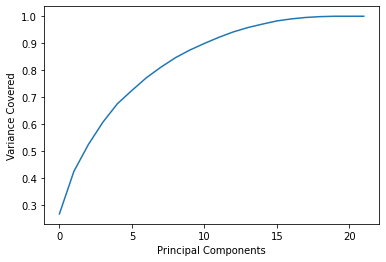

In [53]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

In [54]:
pca = PCA (n_components = 16)
new_pcomp_reg = pca.fit_transform(x_reg_scaled)
princi_comp_reg = pd.DataFrame(new_pcomp_reg, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'])
princi_comp_reg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.274011,0.783442,1.008093,-1.672874,-1.335469,1.715369,2.712604,0.219658,0.130221,0.192793,-1.216704,-0.938262,-0.102524,0.885945,-1.271810,0.051763
1,-1.877012,-1.829060,1.019830,-2.409392,-0.024998,1.340034,2.245519,0.017658,0.718577,-0.984439,-0.604706,-0.349775,0.230541,-0.512687,0.506572,-0.114398
2,-2.452536,-0.402573,1.060611,-2.878893,-0.640607,1.729350,2.257030,0.163050,-0.162996,-0.005139,-0.178735,0.360350,-0.359688,0.302431,-0.161377,-0.205929
3,-2.142775,-3.014123,-0.026099,0.560836,1.788571,1.391387,1.844943,-0.563569,-0.397306,0.584520,-0.751921,0.675724,0.383486,0.329275,-0.591987,-0.085625
4,-0.453363,1.108150,-0.184844,0.311175,-0.861742,1.842381,2.086789,-0.568080,1.160793,-1.051156,-0.614427,-1.438460,1.506803,-0.176742,-1.021683,0.443335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,-0.649233,-2.430196,1.912223,2.396672,1.296654,-0.915174,-1.108541,-0.269556,0.147194,0.238080,-1.074194,0.278786,0.291021,0.168073,0.030983,-0.043107
5976,-0.963239,-3.020830,1.461490,1.471890,1.314964,-0.898194,-1.199715,-0.273138,-0.644629,0.899273,-1.310388,0.527224,-0.277902,0.001289,0.054032,0.168499
5977,-0.839610,-3.363684,0.755084,0.478947,1.001497,-1.055379,-1.316779,-0.503946,-0.147269,0.653819,-0.967824,0.630029,0.210366,0.326209,-0.573125,-0.135066
5978,-1.379983,-2.501705,0.823440,-0.594082,0.290552,-0.909518,-1.307715,-0.201179,0.760616,0.692604,-1.094460,-0.279031,-1.160120,-0.288168,0.293700,0.617895


In [55]:
princi_comp_reg.skew()

PC1    -0.051240
PC2     0.133704
PC3    -0.105490
PC4     0.102057
PC5     0.296859
PC6     0.161052
PC7     0.178649
PC8    -0.100036
PC9     0.242989
PC10   -0.046905
PC11    0.008635
PC12    0.080925
PC13    0.088396
PC14    0.119041
PC15    0.029864
PC16    0.475948
dtype: float64

In [56]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(princi_comp_reg,y_reg,test_size=0.25,random_state=42)

In [57]:
lr = LinearRegression()
lr.fit(x_train_reg,y_train_reg)

LinearRegression()

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
def metric_score(clf,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True):
    if train:
        y_pred_reg = clf.predict(x_train_reg)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train_reg,y_pred_reg)*100:.2f}%')
        
    elif train == False:
        pred_reg = clf.predict(x_test_reg)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test_reg,pred_reg)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_reg,y_reg,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test_reg,pred_reg))
        print('MSE = ',mean_squared_error(y_test_reg,pred_reg))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test_reg,pred_reg)))


In [60]:
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = True)
metric_score(lr,x_train_reg,x_test_reg,y_train_reg,y_test_reg,train = False)


 ======TRAINING RESULT======
Accuracy Score: 61.29%

 ======TESTING RESULT======
Accuracy Score: 61.79%
Cross Validation Score =  0.608702565297204
MAE =  0.8428673281899359
MSE =  3.3354937934646536
RMSE =  1.8263334288854962


In [ ]:
We can note that we are getting training accuracy of 61.29% and Testing accuracy of 61.79% with Linear Regression model

We should now test the data on other models as well to check which model is giving us the best result.

In [61]:
from sklearn.svm import SVR

In [62]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
svr = SVR()
xgb = XGBRegressor()

In [63]:
#TRAINING THE MODELS
knn.fit(x_train_reg,y_train_reg)
dec.fit(x_train_reg,y_train_reg)
ran.fit(x_train_reg,y_train_reg)
svr.fit(x_train_reg,y_train_reg)
xgb.fit(x_train_reg,y_train_reg)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [64]:
print(lr.score(x_train_reg,y_train_reg))
print(knn.score(x_train_reg,y_train_reg))
print(dec.score(x_train_reg,y_train_reg))
print(ran.score(x_train_reg,y_train_reg))
print(svr.score(x_train_reg,y_train_reg))
print(xgb.score(x_train_reg,y_train_reg))

0.6128849124127878
0.7137182808778225
1.0
0.9436360759944593
0.6209503342548535
0.9930628942860082


In [65]:
print(lr.score(x_test_reg,y_test_reg))
print(knn.score(x_test_reg,y_test_reg))
print(dec.score(x_test_reg,y_test_reg))
print(ran.score(x_test_reg,y_test_reg))
print(svr.score(x_test_reg,y_test_reg))
print(xgb.score(x_test_reg,y_test_reg))

0.61786438440946
0.5741858388776894
0.16642308629604796
0.5972010371594667
0.5754593883972952
0.5152416225138587


In [ ]:
We can note, Linear Regression is our best model.
Now we need to check for overfitting.

In [66]:
from sklearn.linear_model import Ridge, RidgeCV

In [67]:
ridgecv = RidgeCV(alphas = np.arange(0.001,10,0.01),normalize=True)
ridgecv.fit(x_train_reg,y_train_reg)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       9.661e+00, 9.671e+00, 9.681e+00, 9.691e+00, 9.701e+00, 9.711e+00,
       9.721e+00, 9.731e+00, 9.741e+00, 9.751e+00, 9.761e+00, 9.771e+00,
       9.781e+00, 9.791e+00, 9.801e+00, 9.811e+00, 9.821e+00, 9.831e+00,
       9.841e+00, 9.851e+00, 9.861e+00, 9.871e+00, 9.881e+00, 9.891e+00,
       9.901e+00, 9.911e+00, 9.921e+00, 9.931e+00, 9.941e+00, 9.951e+00,
       9.961e+00, 9.971e+00, 9.981e+00, 9.991e+00]),
        normalize=True)

In [68]:
ridgecv.alpha_

0.001

In [69]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_reg,y_train_reg)

Ridge(alpha=0.001)

In [70]:
ridge_model.score(x_test_reg,y_test_reg)

0.6178643857733774

In [71]:
x_cl

,Location,Rainfall,WindGustDir,WindDir9am,WindDir3pm,RainToday,Year,Month,Day,MinTemp1,...,WindGustSpeed1,WindSpeed9am1,WindSpeed3pm1,Humidity9am1,Humidity3pm1,Pressure9am1,Cloud9am1,Cloud3pm1,Temp9am1,Temp3pm1
0,1,0.6,13,13,14,0,1.0,12.0,2008.0,13.4,...,44.0,20.0,24.0,71.0,22.0,1007.7,8.000000,5.173594,16.9,21.8
1,1,0.0,14,6,15,0,2.0,12.0,2008.0,7.4,...,44.0,4.0,22.0,44.0,25.0,1010.6,1.041577,1.656602,17.2,24.3
2,1,0.0,15,13,15,0,3.0,12.0,2008.0,12.9,...,46.0,19.0,26.0,38.0,30.0,1007.6,2.101106,2.000000,21.0,23.2
3,1,0.0,4,9,0,0,4.0,12.0,2008.0,9.2,...,24.0,11.0,9.0,45.0,16.0,1017.6,0.451296,1.077309,18.1,26.5
4,1,1.0,13,1,7,0,5.0,12.0,2008.0,17.5,...,41.0,7.0,20.0,82.0,33.0,1010.8,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,0.0,0,2,0,0,20.0,6.0,2017.0,3.5,...,31.0,15.0,13.0,59.0,27.0,1024.7,1.696751,2.114077,9.4,20.9
8420,9,0.0,0,9,1,0,21.0,6.0,2017.0,2.8,...,31.0,13.0,11.0,51.0,24.0,1024.6,0.662706,1.515771,10.1,22.4
8421,9,0.0,6,9,3,0,22.0,6.0,2017.0,3.6,...,22.0,13.0,9.0,56.0,21.0,1023.5,0.531724,1.089647,10.9,24.5
8422,9,0.0,3,9,14,0,23.0,6.0,2017.0,5.4,...,37.0,9.0,9.0,53.0,24.0,1021.0,0.773309,1.513927,12.5,26.1


In [72]:
y_cl

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 5980, dtype: int64

In [73]:
x_cl_scaled = scaler.fit_transform(x_cl.values)
x_cl_scaled

array([[-1.44650985,  0.9919221 ,  0.78710167, ...,  0.50850802,
        -0.16255986, -0.09230474],
       [-1.44650985, -0.63296807,  0.95446446, ..., -0.92533951,
        -0.11035735,  0.32444168],
       [-1.44650985, -0.63296807,  1.11984145, ..., -0.76455083,
         0.55080521,  0.14403441],
       ...,
       [ 1.16903631, -0.63296807, -0.45907147, ..., -1.20729167,
        -1.20681449,  0.35677109],
       [ 1.16903631, -0.63296807, -1.05781851, ..., -0.99419391,
        -0.92830442,  0.61047781],
       [ 1.16903631, -0.63296807,  0.09394442, ..., -0.76455083,
        -0.47579355,  0.59486933]])

In [74]:
pca = PCA()

In [75]:
pca.fit_transform(x_cl_scaled)

array([[ 1.99946261e-02,  1.22729722e+00,  9.59555637e-01, ...,
        -4.75005562e-02,  3.31851289e-01, -5.53920121e-17],
       [-1.92137747e+00, -1.84599004e+00,  9.76955034e-01, ...,
         2.61776963e-01, -5.80716324e-02,  5.01062645e-17],
       [-2.48064997e+00, -4.04573084e-01,  1.02981004e+00, ...,
        -1.06100146e-02,  1.37287821e-01, -2.54860542e-17],
       ...,
       [-9.06782136e-01, -3.40669934e+00,  7.24019318e-01, ...,
         2.79709077e-01, -2.99233019e-01, -2.95621354e-18],
       [-1.43514899e+00, -2.52964759e+00,  7.92245827e-01, ...,
         3.44661941e-01, -3.98153131e-01, -4.73119731e-19],
       [-1.28196748e+00, -1.92235068e+00,  5.02665578e-02, ...,
         3.10052989e-01, -1.60682151e-01, -2.61786215e-18]])

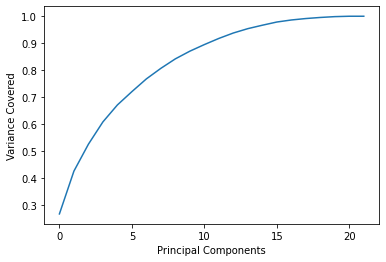

In [76]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.show()

In [77]:
pca = PCA (n_components = 17)
new_pcomp_cl = pca.fit_transform(x_cl_scaled)
princi_comp_cl = pd.DataFrame(new_pcomp_cl, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])
princi_comp_cl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.019995,1.227297,0.959556,-2.065805,-0.239450,1.609877,2.658620,0.181306,0.186617,0.285832,-1.240283,-0.935059,-0.037145,0.808689,-1.250294,0.053687,0.111749
1,-1.921377,-1.845990,0.976955,-2.407119,0.191954,1.324429,2.248862,0.017145,0.722695,-0.996027,-0.595247,-0.358067,0.214632,-0.500418,0.498394,-0.134726,-0.018309
2,-2.480650,-0.404573,1.029810,-2.928803,-0.349097,1.722013,2.274994,0.164250,-0.178343,-0.030027,-0.174969,0.360239,-0.362201,0.307734,-0.183527,-0.188764,0.234870
3,-2.201544,-3.041808,-0.062615,0.717940,1.695511,1.361287,1.818380,-0.566941,-0.395767,0.587690,-0.756084,0.683014,0.403124,0.313091,-0.588790,-0.062415,0.343472
4,-0.085675,1.663225,-0.225147,-0.099802,0.239097,1.711431,2.009498,-0.618208,1.256764,-0.919572,-0.630998,-1.456554,1.570230,-0.269125,-0.960061,0.412182,0.167716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,-0.713091,-2.483455,1.910579,2.495474,0.967293,-0.918129,-1.127524,-0.269990,0.151994,0.240916,-1.076079,0.284815,0.300319,0.163415,0.032020,-0.046429,0.428993
5976,-1.029809,-3.069442,1.442046,1.581659,1.040890,-0.900149,-1.222101,-0.273349,-0.646930,0.895537,-1.317631,0.541377,-0.261511,-0.005787,0.068766,0.160873,0.355762
5977,-0.906782,-3.406699,0.724019,0.576548,0.786644,-1.052494,-1.334217,-0.502721,-0.147399,0.657073,-0.972644,0.640556,0.227450,0.314570,-0.575627,-0.107679,0.622338
5978,-1.435149,-2.529648,0.792246,-0.554033,0.179512,-0.898266,-1.308900,-0.197681,0.755081,0.710711,-1.105842,-0.260302,-1.153520,-0.286008,0.326928,0.602179,0.073384


In [78]:
princi_comp_cl.skew()

PC1    -0.052776
PC2     0.094529
PC3    -0.103691
PC4     0.139238
PC5     0.313841
PC6     0.158196
PC7     0.176625
PC8    -0.099044
PC9     0.246781
PC10   -0.046656
PC11    0.009095
PC12    0.077975
PC13    0.088351
PC14    0.122075
PC15    0.044924
PC16    0.440517
PC17    0.085595
dtype: float64

In [79]:
x_train_cl,x_test_cl,y_train_cl,y_test_cl = train_test_split(princi_comp_cl,y_cl,test_size=0.25,random_state=42)

In [80]:
ranc = RandomForestClassifier()
ranc.fit(x_train_cl,y_train_cl)


RandomForestClassifier()

In [81]:
def metric_score_cl(clf,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True):
    if train:
        y_pred_cl = clf.predict(x_train_cl)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train_cl,y_pred_cl)*100:.2f}%')
        
    elif train == False:
        pred_cl = clf.predict(x_test_cl)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test_cl,pred_cl)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test_cl,pred_cl,digits =2))

In [82]:
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 100.00%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       1.00      1.00      1.00       307

    accuracy                           1.00      1495
   macro avg       1.00      1.00      1.00      1495
weighted avg       1.00      1.00      1.00      1495



In [83]:
pred_cl = ranc.predict(x_test_cl)

In [84]:
conf_matrix = confusion_matrix(y_test_cl,pred_cl)
conf_matrix

array([[1188,    0],
       [   0,  307]], dtype=int64)

In [ ]:
We can note that we are getting training accuracy of 100% and Testing accuracy of 100 % with Random Forest model

In [85]:
from sklearn.svm import SVC

In [86]:
log = LogisticRegression()
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
svc = SVC()
xgb = XGBClassifier()

In [88]:
## TRAINING THE MODELS
log.fit(x_train_cl,y_train_cl)
knn.fit(x_train_cl,y_train_cl)
dec.fit(x_train_cl,y_train_cl)
svc.fit(x_train_cl,y_train_cl)
xgb.fit(x_train_cl,y_train_cl)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [89]:
## Check Training and Testing Accuracies for other models:

print(log.score(x_train_cl,y_train_cl))
print(svc.score(x_train_cl,y_train_cl))
print(knn.score(x_train_cl,y_train_cl))
print(dec.score(x_train_cl,y_train_cl))
print(ranc.score(x_train_cl,y_train_cl))
print(xgb.score(x_train_cl,y_train_cl))

1.0
1.0
0.9997770345596433
1.0
1.0
1.0


In [90]:
print(log.score(x_test_cl,y_test_cl))
print(svc.score(x_test_cl,y_test_cl))
print(knn.score(x_test_cl,y_test_cl))
print(dec.score(x_test_cl,y_test_cl))
print(ranc.score(x_test_cl,y_test_cl))
print(xgb.score(x_test_cl,y_test_cl))

1.0
1.0
1.0
0.991304347826087
1.0
0.9979933110367893


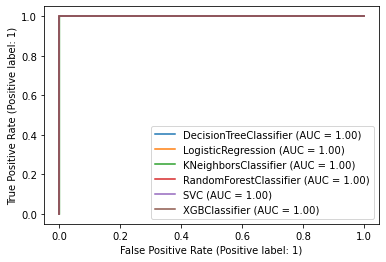

In [91]:
disp = plot_roc_curve(dec,x_train_cl,y_train_cl)
plot_roc_curve(log,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(knn,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(ranc,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(svc,x_train_cl,y_train_cl,ax=disp.ax_)
plot_roc_curve(xgb,x_train_cl,y_train_cl,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

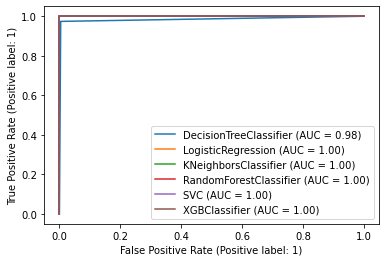

In [92]:
#CHECK ROC AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test_cl,y_test_cl)
plot_roc_curve(log,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(knn,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(ranc,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(svc,x_test_cl,y_test_cl,ax=disp.ax_)
plot_roc_curve(xgb,x_test_cl,y_test_cl,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
We can note, all our models are giving perfect accuracy.

Now, we perform Hyper Parameter Tuning on our best performing models, i.e., Random Forest


In [93]:
params = {'n_estimators':[2,10,20,30,40,50],
         'max_depth':[2,10,20,30,40,50],
         'min_samples_split':[2,10,20,30,40,50],
         'min_samples_leaf':[2,10,20,30,40,50]}

In [94]:
grid_cl = GridSearchCV(ranc, param_grid = params, n_jobs = -1)
grid_cl.fit(x_train_cl,y_train_cl)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 10, 20, 30, 40, 50],
                         'n_estimators': [2, 10, 20, 30, 40, 50]})

In [95]:
print('best parameters: ',grid_cl.best_params_)

best parameters:  {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 40}


In [96]:
ranc_grid = grid_cl.best_estimator_
ranc_grid.fit(x_train_cl,y_train_cl)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, n_estimators=40)

In [97]:
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = True)
metric_score_cl(ranc_grid,x_train_cl,x_test_cl,y_train_cl,y_test_cl,train = False)


 ======TRAINING RESULT======
Accuracy Score: 100.00%

 ======TESTING RESULT======
Accuracy Score: 99.87%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1188
           1       0.99      1.00      1.00       307

    accuracy                           1.00      1495
   macro avg       1.00      1.00      1.00      1495
weighted avg       1.00      1.00      1.00      1495



In [ ]:
The best Accuracy is Random Forest Model Training Result 100% and Accuracy Score is 99.87%.